In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os 
os.chdir('/content/drive/MyDrive')

In [12]:
data = pd.read_csv('2019-Oct.csv')

In [13]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
data.describe()

In [15]:
data['price'].describe()

count    4.244876e+07
mean     2.903237e+02
std      3.582692e+02
min      0.000000e+00
25%      6.598000e+01
50%      1.629300e+02
75%      3.585700e+02
max      2.574070e+03
Name: price, dtype: float64

In [16]:
data['brand'].describe()

count     36331684
unique        3444
top        samsung
freq       5282775
Name: brand, dtype: object

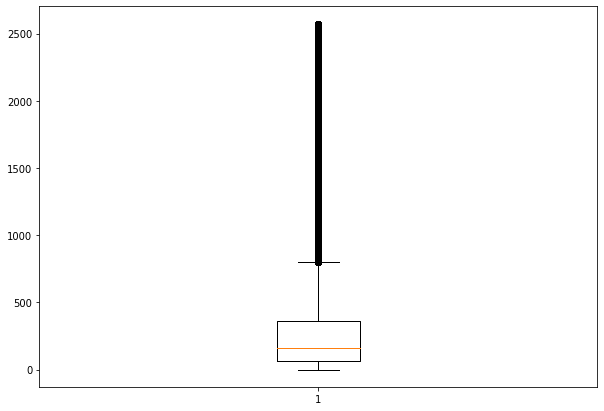

Min: 0.000
Q1: 65.980
Median: 162.930
Q3: 358.570
Max: 2574.070


In [18]:
data_use = data['price']  # replace price with product_id, user_id and category_id
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data_use)
plt.show()
quantiles = np.percentile(data_use, [25,50,75])
data_min, data_max = data_use.min(), data_use.max()
print('Min: %.3f' %data_min)
print('Q1: %.3f' %quantiles[0])
print('Median: %.3f' %quantiles[1])
print('Q3: %.3f' %quantiles[2])
print('Max: %.3f' %data_max)

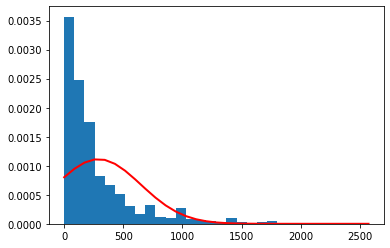

In [19]:
s = data['price']
sigma = np.std(s, ddof=1)
mu =np.mean(s)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [21]:
from scipy.stats import moment
m1 = moment(data['price'], moment=1)
m2 = moment(data['price'], moment=2)
print('1st moment: %.3f' %m1)
print('2nd moment: %.3f' %m2)

1st moment: 0.000
2nd moment: 128356.785
